In [23]:
import pandas as pd
import numpy as np
from utils import bootstrap, youden, sigmoid, bootstrap_reg_new
from sklearn import metrics, calibration
from matplotlib import pyplot as plt
import math
import seaborn as sns

import numpy as np
from sklearn.metrics import roc_curve

def sensivity_specifity_cutoff(y_true, y_score):
    '''Find data-driven cut-off for classification
    
    Cut-off is determied using Youden's index defined as sensitivity + specificity - 1.
    
    Parameters
    ----------
    
    y_true : array, shape = [n_samples]
        True binary labels.
        
    y_score : array, shape = [n_samples]
        Target scores, can either be probability estimates of the positive class,
        confidence values, or non-thresholded measure of decisions (as returned by
        “decision_function” on some classifiers).
        
    References
    ----------
    
    Ewald, B. (2006). Post hoc choice of cut points introduced bias to diagnostic research.
    Journal of clinical epidemiology, 59(8), 798-801.
    
    Steyerberg, E.W., Van Calster, B., & Pencina, M.J. (2011). Performance measures for
    prediction models and markers: evaluation of predictions and classifications.
    Revista Espanola de Cardiologia (English Edition), 64(9), 788-794.
    
    Jiménez-Valverde, A., & Lobo, J.M. (2007). Threshold criteria for conversion of probability
    of species presence to either–or presence–absence. Acta oecologica, 31(3), 361-369.
    '''
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    idx = np.argmax(tpr - fpr)
    return thresholds[idx]


In [ ]:
regression = pd.read_csv(r'EF_predictions_regression.csv')
# bootstrap_reg_new()



In [25]:
ef_35_binary = pd.read_csv(
    '/workspace/Amey/wandb_runs_and_manifests/wandb_runs/lvef_ekg_wandb/EF_binary_35/data/test_predictions.csv')
ef_35_binary.preds = ef_35_binary.preds.apply(sigmoid)
ef_35_binary['low_EF_binary'] = (ef_35_binary.EF_2D < 35) * 1

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3397: DtypeWarning: Columns (119,120,332,477,479,483,487,489,490,491,496,497,504,507,508,509,510) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
sensivity_specifity_cutoff(ef_35_binary.low_EF_binary, ef_35_binary.preds)

0.10491004057916488

In [27]:
bootstrap(ef_35_binary.low_EF_binary, ef_35_binary.preds, 0.105) #0.08 is the Youden index of the EF < 35 classification model


100%|██████████| 10000/10000 [01:08<00:00, 146.73it/s]

auc: 0.878 [0.871, 0.885]
sensitivity: 0.782 [0.767, 0.796]
specificity: 0.827 [0.821, 0.832]
ppv: 0.419 [0.406, 0.432]
npv: 0.96 [0.957, 0.963]


([0.871, 0.885], [0.406, 0.432])

In [21]:
bootstrap_reg_new(predictions[['EF_preds','EF_2D']], 35)

100%|██████████| 10000/10000 [00:33<00:00, 301.25it/s]

AUC is 0.880709 [0.873945, 0.887514]
Sensitivity is 0.407 [0.39, 0.424]
Specificity is 0.972 [0.97, 0.975]
PPV is 0.701 [0.681, 0.723]
NPV is 0.911 [0.907, 0.915]


In [12]:
predictions.EF_2D

0        67.6
1        68.0
2        68.5
3        64.0
4        64.0
         ... 
22084    52.0
22085    66.0
22086    63.7
22087    41.0
22088    65.0
Name: EF_2D, Length: 22089, dtype: float64

In [7]:
predictions = pd.read_csv('/workspace/Amey/wandb_runs_and_manifests/wandb_runs/lvef_ekg_wandb/lvef_31_days_stride8_dilation2/data/test_predictions.csv')


/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3397: DtypeWarning: Columns (119,120,332,477,479,483,487,489,490,491,496,497,504,507,508,509,510) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
predictions

,filename,preds,MRN,gender,age,age_units,race,height_cm,weight_kg,ventricular_rate,...,RV_Base_Dimen_2D,RV_Length_Dimen_2D,RV_Mid_Dimen_MM,RV_Base_Dimen_MM,RV_Length_Dimen_MM,Hepatic_Vein_Diam,PI_Mean_PG,PI_Mean_Velocity,EF_norm,EF_preds
0,MUSE_20210118_083412_96000.npy,0.290555,200052710,FEMALE,81.0,YEARS,BLACK,162.0,48.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.739855,60.283633
1,MUSE_20210212_172141_01000.npy,0.286291,200052710,FEMALE,78.0,YEARS,CAUCASIAN,154.0,65.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.764419,60.214197
2,MUSE_20210303_084404_33000.npy,0.198205,200052710,FEMALE,76.0,YEARS,CAUCASIAN,162.0,85.0,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.795124,58.779810
3,MUSE_20210213_173038_94000.npy,0.307735,200052710,FEMALE,79.0,YEARS,BLACK,157.0,63.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.518778,60.563392
4,MUSE_20210213_173420_04000.npy,-0.077024,200052710,FEMALE,79.0,YEARS,BLACK,157.0,56.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.518778,54.298016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22084,MUSE_20210211_105345_10000.npy,0.350944,200348061,MALE,42.0,YEARS,CAUCASIAN,187.0,109.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.218145,61.267012
22085,MUSE_20210211_223605_52000.npy,0.522689,200475536,MALE,60.0,YEARS,CAUCASIAN,167.0,61.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.641598,64.063687
22086,MUSE_20230106_204230_76000.npy,0.369440,202006077,MALE,23.0,YEARS,BLACK,193.0,107.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500355,61.568189
22087,MUSE_20210213_110706_01000.npy,-0.176982,200456525,FEMALE,87.0,YEARS,CAUCASIAN,157.0,62.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.893658,52.670299


/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3397: DtypeWarning: Columns (119,120,332,477,479,483,487,489,490,491,496,497,504,507,508,509,510) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


([<matplotlib.axis.YTick at 0x7fd1b95ba8b0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

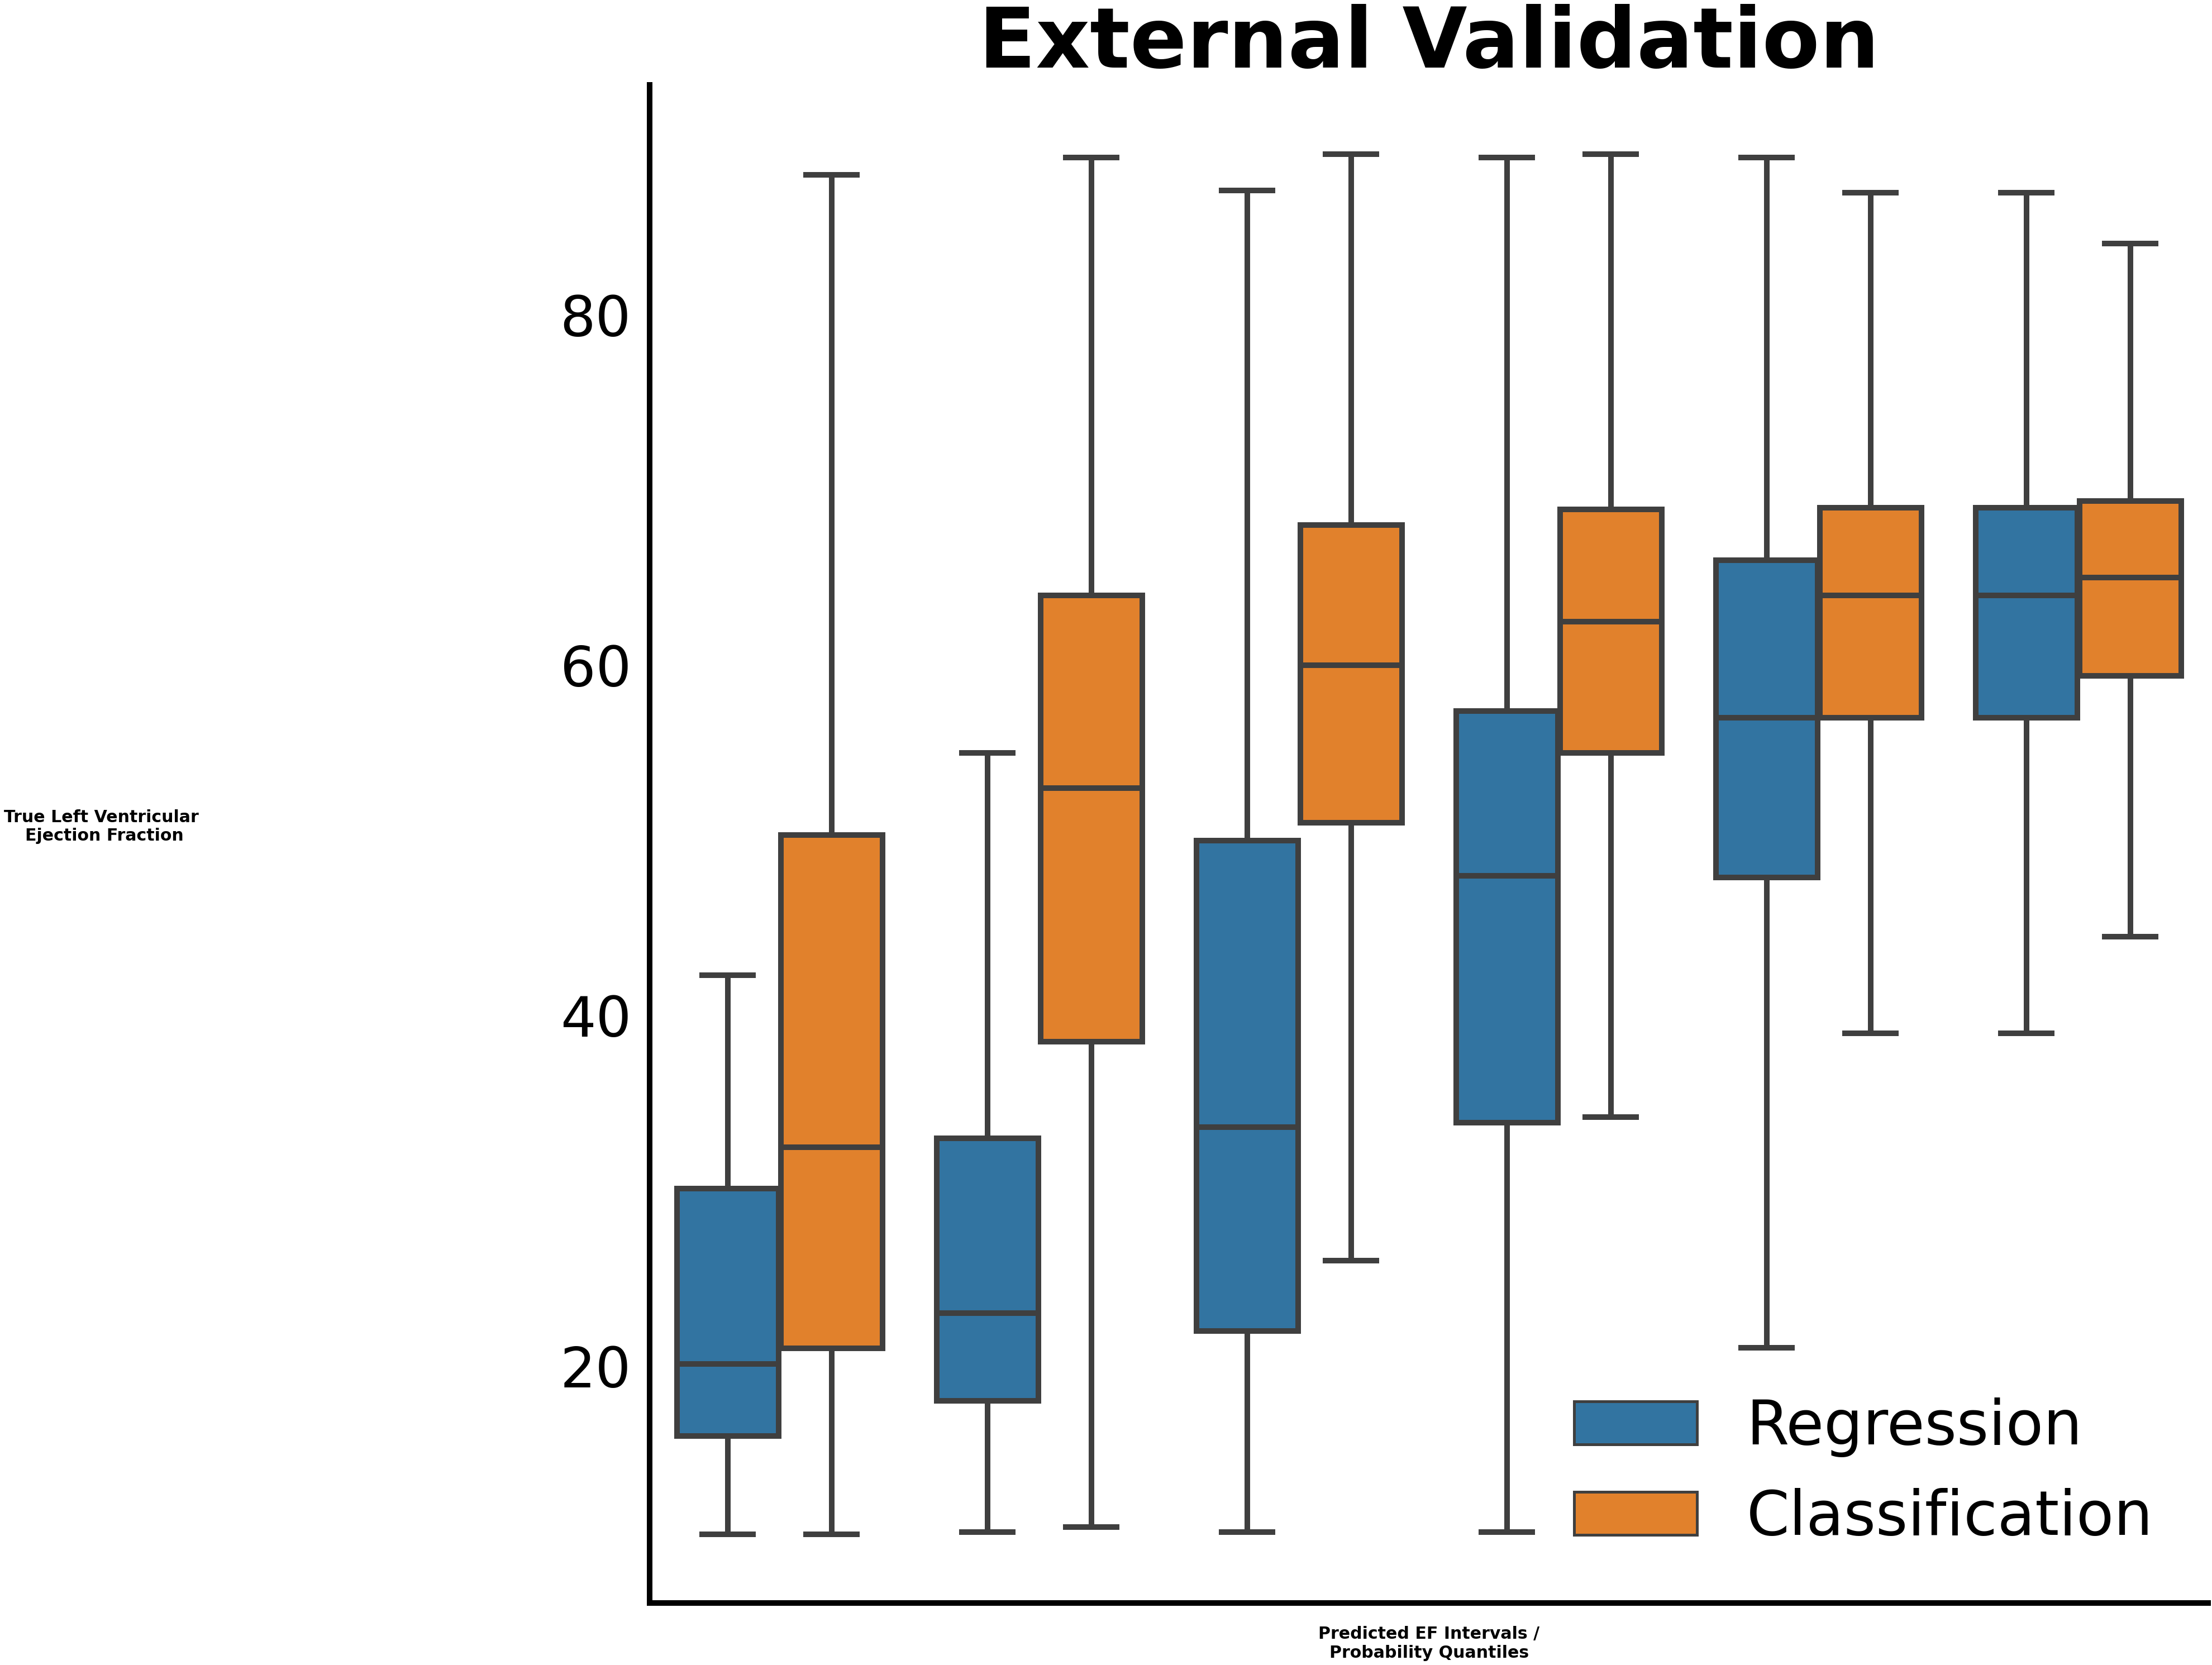

In [6]:
## Regression and Binary Models - 6 bins for Classification and 6 equal Buckets for Regression

# predictions = pd.read_csv('EF_predictions_regression')

predictions = pd.read_csv('/workspace/Amey/wandb_runs_and_manifests/wandb_runs/lvef_ekg_wandb/lvef_31_days_stride8_dilation2/data/test_predictions.csv')
labels_6 = ['0-1/6','1/6-1/3','1/3-1/2','1/2-2/3','2/3-5/6','5/6-1']

predictions['EF_preds_bins'] = pd.cut(predictions.EF_preds, np.linspace(10,70,7), True, labels_6)
data_reg = pd.DataFrame()

for i in range(0,len(labels_6)):
    if i == 0:
        data_reg = pd.DataFrame(list(predictions[predictions.EF_preds_bins.isin([labels_6[i]])].EF_2D),
                                  columns = ['True_EF'])
        data_reg['quantile'] = labels_6[i]
        
    else:
        temp = pd.DataFrame(data = list(predictions[predictions.EF_preds_bins.isin([labels_6[i]])].EF_2D),
                            columns = ['True_EF'])
        temp['quantile'] = labels_6[i]
        data_reg = pd.concat([data_reg, temp], axis = 0)
        
data_reg['Model'] = 'Regression'


ef_35_binary = pd.read_csv('/workspace/Amey/wandb_runs_and_manifests/wandb_runs/lvef_ekg_wandb/EF_binary_35/data/test_predictions.csv')
# ef_35_binary = pd.read_csv('EF_predictions_classification.csv')
ef_35_binary.preds = 1- ef_35_binary.preds.apply(sigmoid)
ef_35_binary['EF_preds_bins'] = pd.cut(ef_35_binary.preds,
                                       np.quantile(ef_35_binary.preds,np.linspace(
                                           0,1,7)), True, labels_6)
data_binary = pd.DataFrame()

quantile_order = labels_6

for i in range(0,len(labels_6)):
    if i == 0:
        data_binary = pd.DataFrame(list(ef_35_binary[ef_35_binary.EF_preds_bins.isin([labels_6[i]])].EF_2D),
                                  columns = ['True_EF'])
        data_binary['quantile'] = labels_6[i]
        
    else:
        temp = pd.DataFrame(data = list(ef_35_binary[ef_35_binary.EF_preds_bins.isin([labels_6[i]])].EF_2D),
                            columns = ['True_EF'])
        temp['quantile'] = labels_6[i]
        data_binary = pd.concat([data_binary, temp], axis = 0)

data_binary['Model'] = 'Classification'

data = pd.concat([data_reg, data_binary])

fig = plt.figure(figsize=(50,50))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['top'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['right'].set_color('black')
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

plt.tick_params(axis='y', which='major', pad=30)  # Adjust the 'pad' value as needed
plt.rcParams['axes.linewidth'] = 10



sns.boxplot(data=data, x = 'quantile', y = 'True_EF',
            hue = 'Model', order = quantile_order, width=0.8, showfliers=False, linewidth=10)

ax.yaxis.set_label_coords(-.35, 0.5)

# sns.set(font_scale = 11)

# plt.plot([0,1],[0,100])

plt.title('External Validation', size = 150, fontweight = 'bold')
plt.xlabel('\nPredicted EF Intervals /\nProbability Quantiles', size = 30, fontweight = 'bold')
plt.ylabel('True Left Ventricular \nEjection Fraction', size = 30, rotation = 0, fontweight = 'bold')

plt.legend(loc = 'lower right', fontsize = 110, frameon=False)

plt.xticks([],fontsize=100)
plt.yticks(np.linspace(20,80,4),fontsize=100, rotation=0)
